In [2]:
#Proj6 Victor Zhang
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def GMM(x): #GMM same as in proj5 but in expression form not sampling
    return 200/350* stats.norm(loc = 0, scale = 5).pdf(x) \
           + 50/350 * stats.norm(loc = 5, scale = 2).pdf(x) \
           + 100/350 * stats.norm(loc = -7, scale = 0.5).pdf(x)

#rejection sampling
def RS(func, rv, k, n):# distribution, proposal, scaler, target size
    s=[]
    while len(s) < n:
        temp = rv.rvs(size = 1)
        thresh = func(temp) / (k * rv.pdf(temp))
        if np.random.uniform() < thresh:
            s.append(temp[0])
    return s

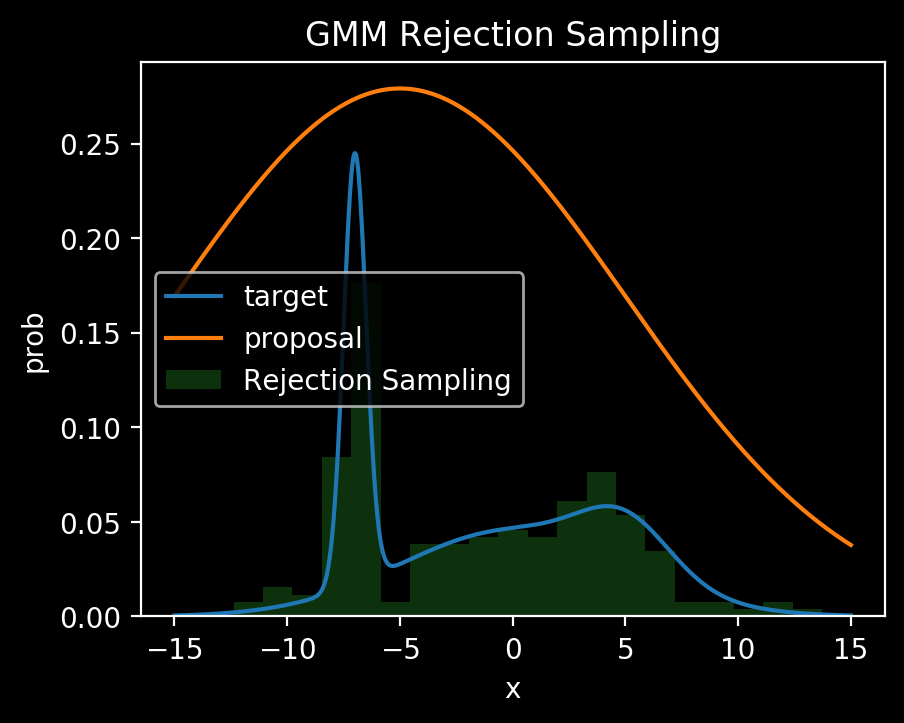

In [3]:
np.random.seed(767442)
n_samples = 200
k = 7
x = np.linspace(-15, 15, 1000)
rv = stats.norm(loc = -5, scale = 10)
samples = RS(GMM, rv, k, n_samples)
#plot p
plt.plot(x, GMM(x), label="target")
#plot k*q
plt.plot(x,k*rv.pdf(x), label="proposal")
#plot sampling results
plt.hist(samples, density=True, alpha=0.3, bins = 20, label = "Rejection Sampling")
plt.legend(fontsize=10)
plt.xlabel("x")
plt.ylabel("prob")
plt.title("GMM Rejection Sampling")
plt.show()

In [5]:
#get log prior
def prior(w):
    w0 = stats.norm(1,1).pdf(w)
    return np.sum(np.log(w0))

# log llh of y given w ane x
def log_llh(w, x, y):
    y_predict = w[0] + w[1] * x
    llh = stats.norm(y_predict, std).pdf(y)
    return np.sum(np.log(llh))

# get log posterior = llh + prior
def posterior(w, x, y):
    return log_llh(w, x, y) + prior(w)

# jump to new w
def get_new(w):
    w0 = np.random.normal(w[0], 0.5)
    w1 = np.random.normal(w[1], 0.5)
    return [w0,w1]


# hyper params
n_samples = 25
n_iters=2000
burn_in = 1000
std = 0.2
w0 = -0.3
w1 = 0.5

np.random.seed(767442)
# generate data space & shuffle
x1 = np.linspace(-1,1,n_samples)
np.random.shuffle(x1)
# generate target t as described in pg.154
y = w0 + w1 * x1
g_noise = np.random.normal(0,std,n_samples)
y = y + g_noise
x2 = [np.ones(np.shape(x1)),x1]
x2 = np.transpose(x2)

print('True: w0 : %.4f, w1 : %.4f' %(w0, w1))


# MCMC
results = np.zeros([n_iters,2])
results[0] = [1,2] #initial guess intentially chosen to be far from truth
for i in range(1, n_iters):
#get new param
    old = results[i-1]
    new = get_new(old)
#check for eligibility
    prob = np.exp(posterior(new, x1, y) - posterior(old, x1, y))
#update by 11.33
    if np.random.uniform() < prob:
        results[i, :] = new
    else:
        results[i, :] = old
#burn first 1000
burnt = results[burn_in:]
param = burnt.mean(axis=0)
print('Esti: w0 : %.4f, w1 : %.4f' %(param[0],param[1]))

True: w0 : -0.3000, w1 : 0.5000
Esti: w0 : -0.2940, w1 : 0.5221
